#Analyze US Stock Index funds using Macroeconomics and Forecast

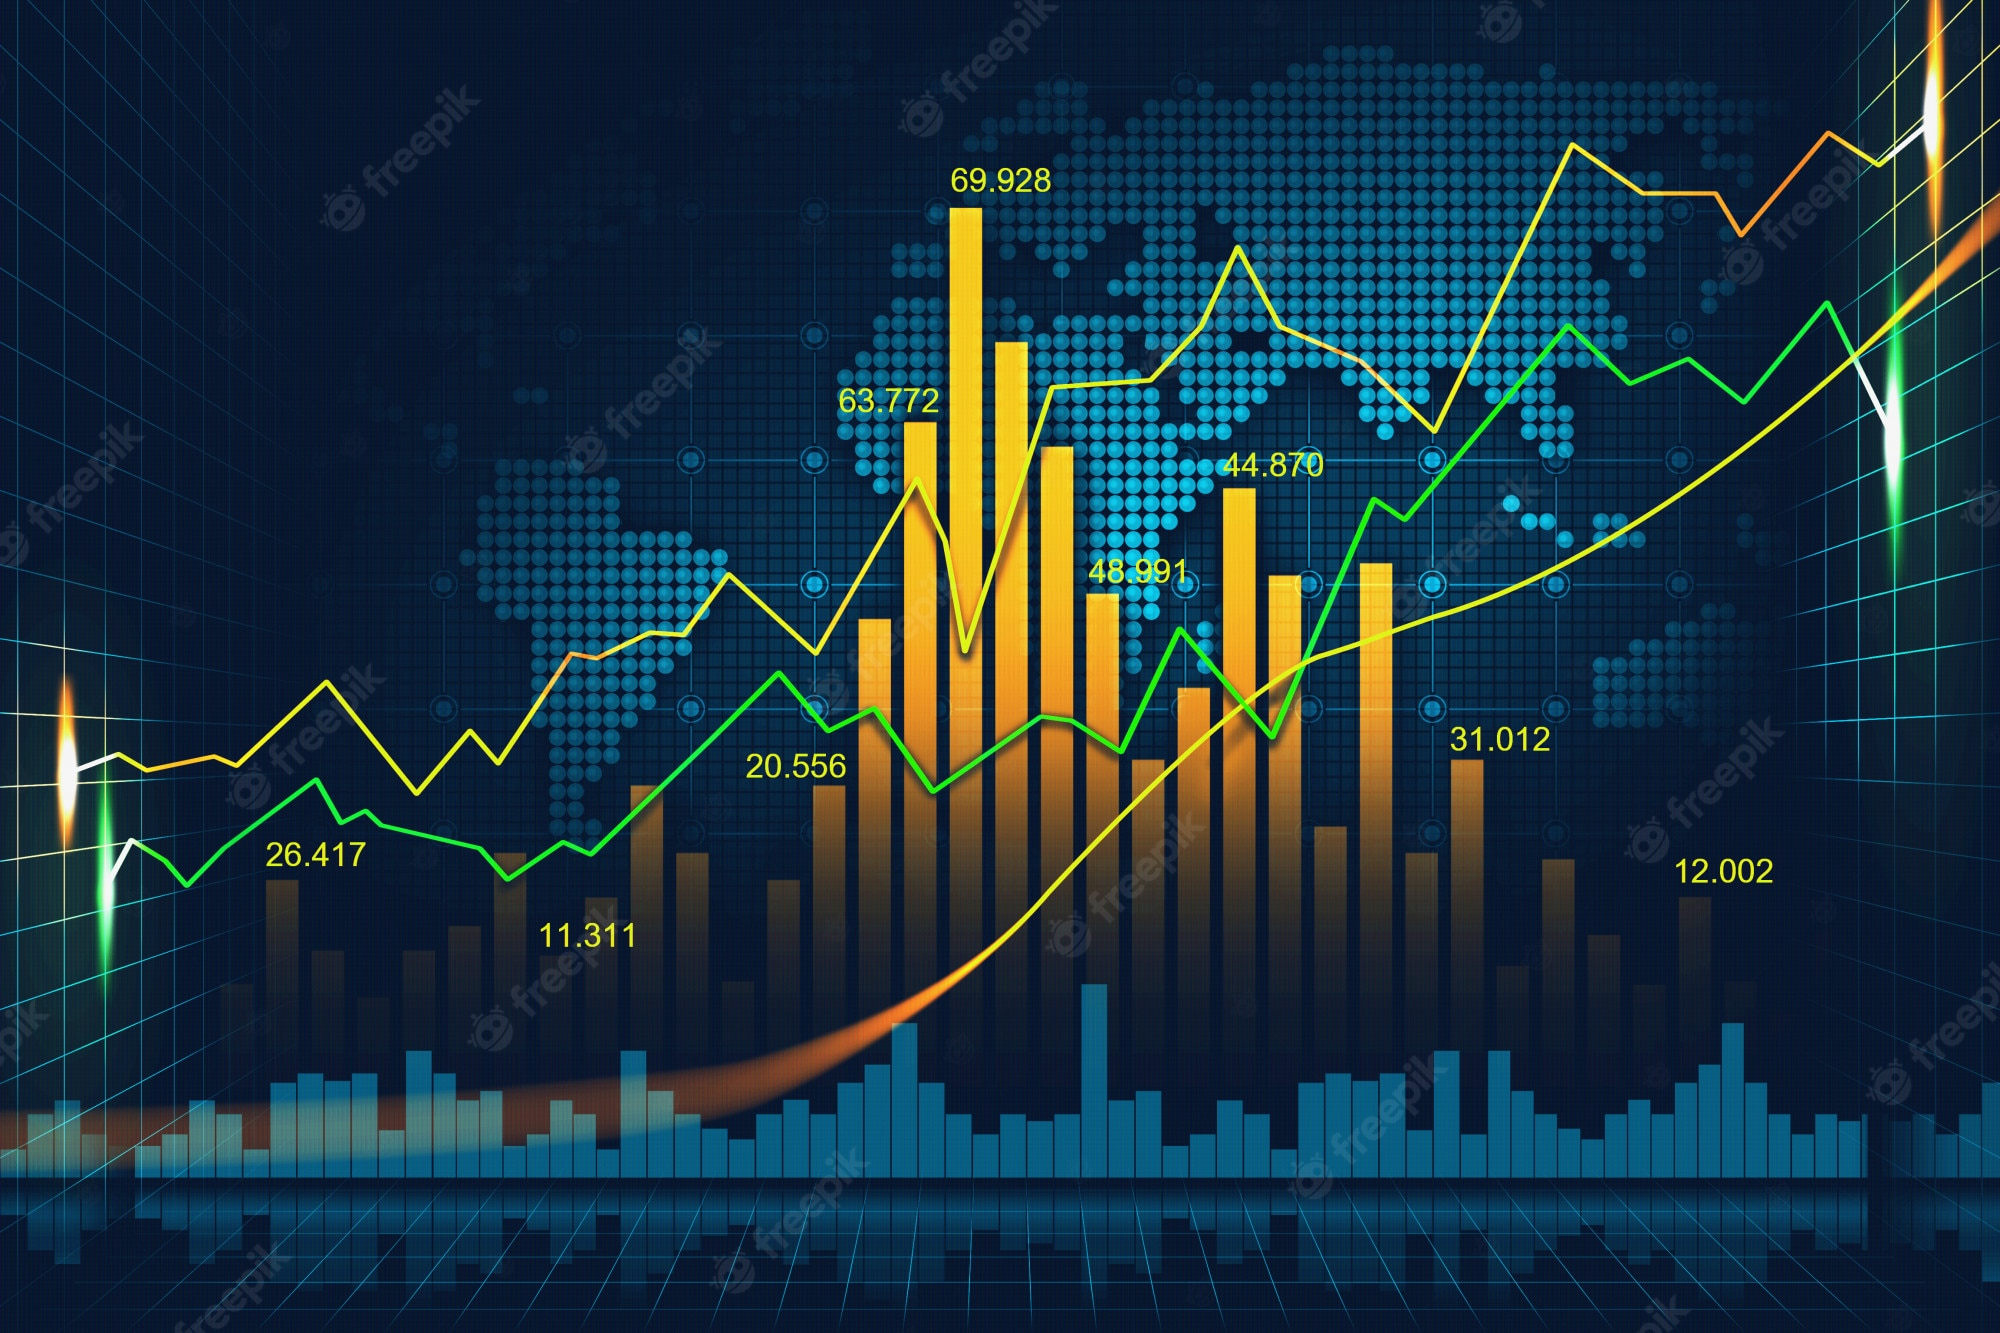



###Team Members 

Name: Sai Sravya Anem 

Email: sanem001@odu.edu

Portfolio: https://saisravyaanem.github.io/

Name: Swareena Suri Lakkakula

Email: slakk002@odu.edu

Portfolio: https://swareenasuri.github.io/

Name: Nitya Yerraguntla

Email: nyerr001@odu.edu



### Abstract

US stocks and equity markets are undergoing major economic turbulence due to the pandemic and FED monitory policies. We learnt the general health of macroeconomy can be assesed from indicators like GDP, Unemployment rate, Consumer Price Index, Retail Sales, etc. We want to extract this data from public websites, clean and transform to build a narrative that could explain the movement in the Stock Indexes like S&P 500. We would also like to forecast the stock prices for few quarters in 2022 & 2023.


### Goal

* Learn about macroeconomic factors to consider for Stock Market analysis.
* Onboard & apply transformation on the data from various public data sources.
* Perform descriptive & inferential data analysis to test the hypothesis.
* Apply regression based alogorithms to forecast upcoming market trend.


##Design decisions

Stock market enthusiasts who would like to understand the market moves based on various social and economic activity. We are trying to identify the relation using data analysis and identify key features that generally impact stock performance.

Here we are using various APIs provided by NASDAQ, Yahoo Finance for clean historical stock indeces as well as Economic data like GDP, CPI etc. I am using Python programming here and mainly going to use Pandas, Numpy, Matplotlib, some regression algorithms in Sklearn library.


### Data Models

We have categorized our data sources into 4.

1. Stock Indeces
2. Economic Factors Data from NASDAQ
3. Yahoo Finance
4. Federal Reserve & Economics Data

A combined datasets by joining based on time horizon. Each of these datasets has date columns recorded in different frequencies so we are extrapolating the dates to match the daily frequency data.

### Data Source

* S&P 500 Data - https://finance.yahoo.com/quote/%5EGSPC/

* Vangaurd Overall Stock Market Index Fund - https://finance.yahoo.com/quote/VTI/

* Gross Domestic Product - https://www.bea.gov/data/gdp/gross-domestic-product

* Unemployment Data - https://data.bls.gov/timeseries/LNS14000000

* Consumer Price Index - https://www.bls.gov/cpi/

* Retail Sales Index - https://tradingeconomics.com/united-states/retail-sales

* Zillow Home Value Index - https://www.zillow.com/research/data/



### Project Plan

* Abstract: 08/30/22- 09/19/22
* Data cleaning and Data Wrangling:	09/21/22-10/02/22
* Data Analysis / Prep for Progress Check In:	10/04/22-10/16/22
* Explore and Create Visualizations: 10/17/22-10/24/22
* Prep for Progress Check II: 10/25/22-11/13/22
* Finalize and Prepare Final Report: 11/14/22-12/04/22

### Import Libraries

In [ ]:
# install yfinance library
!pip install yfinance
!pip install quandl

from collections import OrderedDict
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import yfinance as yf
import matplotlib.pyplot as matplt
from google.colab import drive

import quandl
import pandas_datareader as pdr

import pandas as pd
pd.set_option('display.max_columns', 100)
import yfinance as yf
import numpy as np

from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import copy

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 677 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Extraction

#### 1. Stock Indeces - Data

We have below S&P 500 Index, Vanguard Total Index, Dow Jones extracted from Yahoo Finance API.

In [ ]:
# SPDR S&P 500 ETF Trust Extract(Datasource)
SPY = yf.download('SPY','1990-01-01','2022-09-01')
SPY.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,415.239990,419.559998,414.089996,419.510010,417.793793,50942300
2022-08-26,419.390015,419.959991,405.250000,405.309998,403.651855,103087000
2022-08-29,402.200012,405.839996,401.200012,402.630005,400.982849,65370800
2022-08-30,403.850006,404.100006,396.000000,398.209991,396.580902,85652400
2022-08-31,399.929993,401.239990,395.040009,395.179993,393.563293,76029700


In [ ]:
# Vangaurd Overall Stock Market Index Fund (Datasource)  
VTI = yf.download('VTI','1990-01-01','2022-09-01')
VTI.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,208.600006,210.820007,208.130005,210.750000,209.859055,1874100
2022-08-26,210.860001,210.919998,203.699997,203.770004,202.908569,3550200
2022-08-29,202.199997,203.949997,201.619995,202.279999,201.424850,3529100
2022-08-30,202.940002,203.130005,198.899994,200.029999,199.184372,4799400
2022-08-31,200.949997,201.559998,198.500000,198.559998,197.720581,2911400


In [ ]:
# Dow Jones Index 
DJI = yf.download('DJI','1990-01-01','2022-09-01')
DJI.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,33223.800781,33223.800781,33223.800781,33223.800781,33223.800781,0
2022-02-25,34058.800781,34058.800781,34058.800781,34058.800781,34058.800781,0
2022-02-28,33892.601562,33892.601562,33892.601562,33892.601562,33892.601562,0
2022-03-01,33294.898438,33294.898438,33294.898438,33294.898438,33294.898438,0
2022-03-02,33891.300781,33891.300781,33891.300781,33891.300781,33891.300781,0


#### 2. Annual General Economic Indicators - Data

Here we have extracted a dataset with annual economic indicators like:

* Gross domestic product (GDP)	
* Personal consumption expenditures	
* Goods	
* Durable goods	
* Nondurable goods	
* Services
* Gross private domestic investment	
* Fixed investment
* Nonresidential
* Structures

In [ ]:
drive.mount('/content/gdrive')
pd.read_csv('/content/gdrive/MyDrive/Stock-Market-Analysis/GDP.csv').head(10)

Mounted at /content/gdrive


,category,2019,2020,2021
0,Gross domestic product (GDP),2.3,-3.4,5.7
1,Personal consumption expenditures,2.2,-3.8,7.9
2,Goods,3.4,4.6,12.2
3,Durable goods,4.3,7.7,18.1
4,Nondurable goods,2.9,3.1,9.1
5,Services,1.7,-7.5,5.8
6,Gross private domestic investment,3.4,-5.5,9.8
7,Fixed investment,3.2,-2.7,7.8
8,Nonresidential,4.3,-5.3,7.4
9,Structures,2.0,-12.5,-8.0


#### 3. Unemployment - Data

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/Stock-Market-Analysis/Unemployement Datasource.csv').head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2012,242269,242435,242604,242784,242966,243155,243354,243566,243772.0,243983.0,244174.0,244350.0
1,2013,244663,244828,244995,245175,245363,245552,245756,245959,246168.0,246381.0,246567.0,246745.0
2,2014,246915,247085,247258,247439,247622,247814,248023,248229,248446.0,248657.0,248844.0,249027.0
3,2015,249723,249899,250080,250266,250455,250663,250876,251096,251325.0,251541.0,251747.0,251936.0
4,2016,252397,252577,252768,252969,253174,253397,253620,253854,254091.0,254321.0,254540.0,254742.0


#### 4. Consumer Price Index - Data

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/Stock-Market-Analysis/Consumer Price Index.csv').head(5)

,series_id \tyear\tperiod\t value\tfootnote_codes
0,CUSR0000SA0 \t1947\tM01\t 21.48\t
1,CUSR0000SA0 \t1947\tM02\t 21.62\t
2,CUSR0000SA0 \t1947\tM03\t 22.00\t
3,CUSR0000SA0 \t1947\tM04\t 22.00\t
4,CUSR0000SA0 \t1947\tM05\t 21.95\t


#### 5. Home Rate Values - Data

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/Stock-Market-Analysis/Home value.csv').head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,country,NaN,127881.0,128227.0,128591.0,129332.0,130079.0,...,318303.0,322658.0,327381.0,332588.0,337848.0,343392.0,348415.0,352585.0,354986.0,356026.0
1,394913,1,"New York, NY",msa,NY,224676.0,226018.0,227226.0,229604.0,231817.0,...,573600.0,576842.0,580804.0,585445.0,591876.0,599008.0,606525.0,612535.0,616856.0,619142.0
2,753899,2,"Los Angeles, CA",msa,CA,227786.0,228579.0,229794.0,232104.0,234580.0,...,845860.0,855023.0,865646.0,877802.0,895038.0,914016.0,930381.0,931707.0,928599.0,914636.0
3,394463,3,"Chicago, IL",msa,IL,170004.0,170405.0,170924.0,171963.0,173064.0,...,288807.0,291527.0,294162.0,296729.0,300023.0,303490.0,307454.0,310438.0,312286.0,312609.0
4,394514,4,"Dallas, TX",msa,TX,129921.0,130025.0,130112.0,130323.0,130544.0,...,337274.0,343129.0,350514.0,358982.0,367040.0,376487.0,385149.0,392668.0,394861.0,393920.0


## Federal Reserve & Economic Data

NASDAQ and FRED APIs provides easy access to the economic indicators.

In [ ]:
STOOQ_INDICATORS = {'^DJI','^SPX'} # Popular stock indicators

FRED_INDICATORS = [# 1. Growth
                   'GDP', 'GDPC1', 'GDPPOT', 'NYGDPMKTPCDWLD',     
                   # 2. Prices and Inflation    
                   'CPIAUCSL', 'CPILFESL', 'GDPDEF',
                   # 3. Money Supply                   
                   'M1SL', 'WM1NS', 'WM2NS', 'M1V', 'M2V', 'WALCL',
                   # 4. Interest Rates    
                   'DFF', 'DTB3', 'DGS5', 'DGS10', 'DGS30', 'T5YIE', 'T10YIE', 'T5YIFR', 'TEDRATE', 'DPRIME', 
                   # 5. Employment           
                   'UNRATE', 'NROU', 'CIVPART', 'EMRATIO', 'UNEMPLOY', 'PAYEMS', 'MANEMP', 'ICSA', 'IC4WSA', 
                   # 6. Income and Expenditure  
                   'CDSP', 'MDSP', 'FODSP', 'DSPIC96', 'PCE', 'PCEDG', 'PSAVERT', 'DSPI', 'RSXFS', 
                   # 7. Other indicators                        
                   'INDPRO', 'TCU', 'HOUST', 'GPDI', 'CP', 'STLFSI2', 'DCOILWTICO', 'DTWEXAFEGS', 'DTWEXBGS',   
                   # 8. Govt debt          
                   'GFDEBTN', 'GFDEGDQ188S',     
                   # 9. Additional indicators from IVAN                      
                   'DEXUSEU', 'GVZCLS', 'VIXCLS', 'DIVIDEND', 'MORTGAGE30US', 'SPCS20RSA'             
                  ]
# 9. Additional indicators from IVAN
QUANDL_INDICATORS = {
                     'BCHAIN/MKPRU', 'USTREASURY/YIELD', 'USTREASURY/REALYIELD', 'MULTPL/SHILLER_PE_RATIO_MONTH', 'LBMA/GOLD'
                    }

# Assign time window period for each indicators. 
# Y=Yearly, Q=Quarterly, M=Monthly, W=Weekly, D=Daily
INDICATORS_PERIODS = {# 1. Growth
                      'GDP': 'Q', 'GDPC1': 'Q', 'GDPPOT': 'Q', 'NYGDPMKTPCDWLD': 'Y',                 
                      # 2. Prices and Inflation
                      'CPIAUCSL': 'M', 'CPILFESL': 'M', 'GDPDEF': 'Q',
                      # 3. Money Supply
                      'M1SL': 'M', 'WM1NS': 'W', 'WM2NS': 'W', 'M1V': 'Q', 'M2V': 'Q', 'WALCL': 'W',
                      # 4. Interest Rates
                      'DFF': 'D', 'DTB3': 'D', 'DGS5': 'D', 'DGS10': 'D', 'DGS30': 'D', 'T5YIE': 'D', 'T10YIE': 'D', 'T5YIFR': 'D', 'TEDRATE': 'D', 'DPRIME': 'D',
                      # 5. Employment
                      'UNRATE': 'M', 'NROU': 'Q', 'CIVPART': 'M', 'EMRATIO': 'M', 'UNEMPLOY': 'M', 'PAYEMS': 'M', 'MANEMP': 'M', 'ICSA': 'W', 'IC4WSA': 'W',
                      # 6. Income and Expenditure
                      'CDSP': 'Q', 'MDSP': 'Q', 'FODSP': 'Q', 'DSPIC96': 'M', 'PCE': 'M', 'PCEDG': 'M', 'PSAVERT': 'M', 'DSPI': 'M', 'RSXFS': 'M',
                      # 7. Other indicators
                      'INDPRO': 'M', 'TCU': 'M', 'HOUST': 'M', 'GPDI': 'Q', 'CP': 'Q', 'STLFSI2': 'W', 'DCOILWTICO': 'D', 'DTWEXAFEGS': 'D', 'DTWEXBGS': 'D',
                      # 8. Gov-t debt
                      'GFDEBTN': 'Q', 'GFDEGDQ188S': 'Q',
                      # 9. FRED: Additional indicators from IVAN
                      'DEXUSEU': 'D', 'GVZCLS': 'D', 'VIXCLS': 'D', 'DIVIDEND': 'Q', 'MORTGAGE30US': 'W', 'SPCS20RSA': 'M', 'BCHAIN_MKPRU': 'D', 'USTREASURY_YIELD': 'D', 'USTREASURY_REALYIELD': 'D', 'MULTPL_SHILLER_PE_RATIO_MONTH': 'M', 'LBMA_GOLD': 'D',
                      # 10. INDEXES
                      'SPX': 'D', 'DJI': 'D'
                      }

## Data Extraction using APIs

In [ ]:
end = date.today()
start = date(year=end.year-35, month=end.month, day=end.day)
macro_indicators = dict()
tq_fred = tqdm(FRED_INDICATORS)

tq_fred.set_description('Downloading stats from FRED:')
for indicator in tq_fred:
  macro_indicators[indicator] = pdr.fred.FredReader(indicator, start=start, timeout=90).read()

In [ ]:
tq_quandl = tqdm(QUANDL_INDICATORS)

tq_quandl.set_description("Downloading stats from QUANDL:")

for indicator in tq_quandl:
 macro_indicators[indicator.replace("/", "_")] = quandl.get(indicator, start_date=start, end_date=end, authtoken="5qE7KbLemDiZ9RfNsVuM")

for indicator in tqdm(STOOQ_INDICATORS):
  macro_indicators[indicator.replace("^", "")]= pdr.get_data_stooq(indicator, start, end)

100%|██████████| 2/2 [00:03<00:00,  1.94s/it]



GDP, GDPC1, GDPPOT, NYGDPMKTPCDWLD, CPIAUCSL, CPILFESL, 

GDPDEF, M1SL, WM1NS, WM2NS, M1V, M2V, 

WALCL, DFF, DTB3, DGS5, DGS10, DGS30, 

T5YIE, T10YIE, T5YIFR, TEDRATE, DPRIME, UNRATE, 

NROU, CIVPART, EMRATIO, UNEMPLOY, PAYEMS, MANEMP, 

ICSA, IC4WSA, CDSP, MDSP, FODSP, DSPIC96, 

PCE, PCEDG, PSAVERT, DSPI, RSXFS, INDPRO, 

TCU, HOUST, GPDI, CP, STLFSI2, DCOILWTICO, 

DTWEXAFEGS, DTWEXBGS, GFDEBTN, GFDEGDQ188S, DEXUSEU, GVZCLS, 

VIXCLS, DIVIDEND, MORTGAGE30US, SPCS20RSA, MULTPL_SHILLER_PE_RATIO_MONTH, LBMA_GOLD, 

BCHAIN_MKPRU, USTREASURY_YIELD, USTREASURY_REALYIELD, SPX, DJI, 

### Plot Stock Market Indeces

Here we plotted stock index prices over time.

In [ ]:
macro_indicators['SPX'] = macro_indicators['SPX'].reindex(index=macro_indicators['SPX'].index[::-1])
macro_indicators['DJI'] = macro_indicators['DJI'].reindex(index=macro_indicators['DJI'].index[::-1])

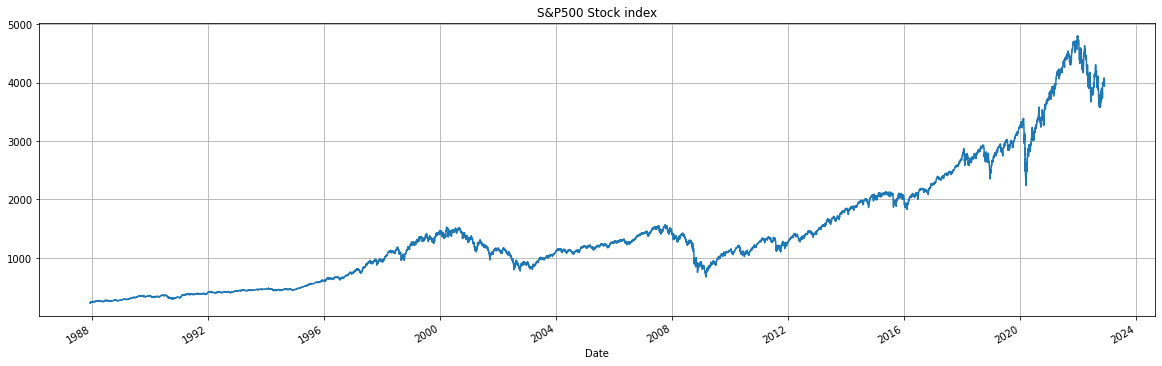

In [ ]:
macro_indicators['SPX']['Close'].plot.line(figsize=(20,6), grid = True, title='S&P500 Stock index')
plt.show()

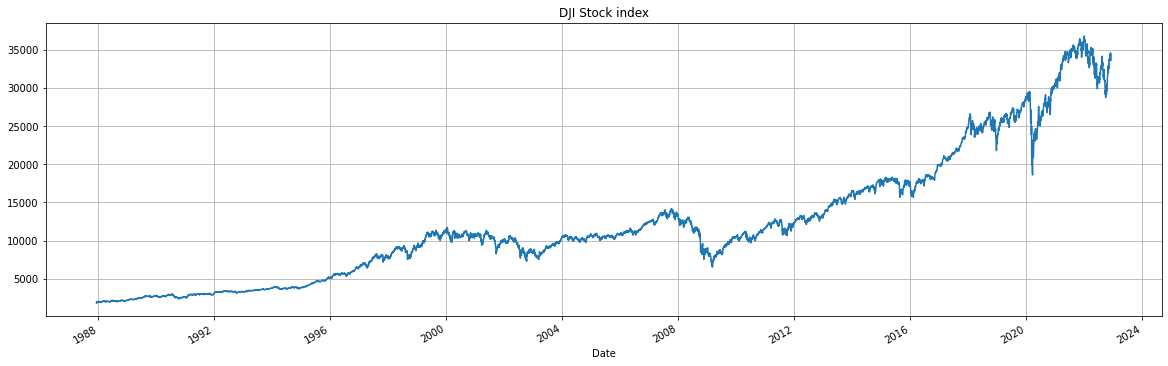

In [ ]:
macro_indicators['DJI']['Close'].plot.line(figsize=(20,6), grid = True, title='DJI Stock index')
plt.show()

In [ ]:
macro_indicators['SPX']['daily_return'] = (macro_indicators['SPX']['Close']/ macro_indicators['SPX']['Close'].shift(1)) -1

df=pd.DataFrame(macro_indicators['SPX'])

df.dropna(inplace=True)
print(df)

               Open     High      Low    Close        Volume  daily_return
Date                                                                      
1987-12-08   228.77   234.92   228.69   234.91  1.262833e+08      0.026884
1987-12-09   234.91   240.09   233.83   238.89  1.285722e+08      0.016943
1987-12-10   238.89   240.05   233.40   233.57  1.049778e+08     -0.022270
1987-12-11   233.60   235.48   233.35   235.32  8.426667e+07      0.007492
1987-12-14   235.30   242.34   235.04   242.19  1.042667e+08      0.029194
...             ...      ...      ...      ...           ...           ...
2022-11-30  3957.18  4080.11  3938.58  4080.11  3.721832e+09      0.030948
2022-12-01  4087.14  4100.51  4050.87  4076.57  2.316143e+09     -0.000868
2022-12-02  4040.17  4080.48  4026.63  4071.70  2.073994e+09     -0.001195
2022-12-05  4052.02  4052.45  3984.49  3998.84  2.283039e+09     -0.017894
2022-12-06  3996.63  4001.51  3918.39  3941.26  2.362227e+09     -0.014399

[8820 rows x 6 columns]


#### Graph for S&P 500 Index daily returns

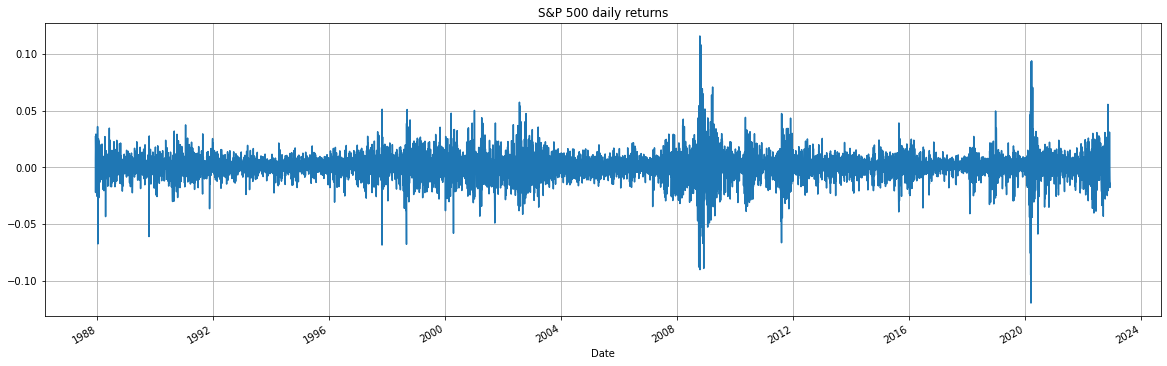

In [ ]:
df['daily_return'].plot.line(figsize=(20,6), grid = True, title='S&P 500 daily returns')
plt.show()

#### Dow Jones Stock Index - Plot

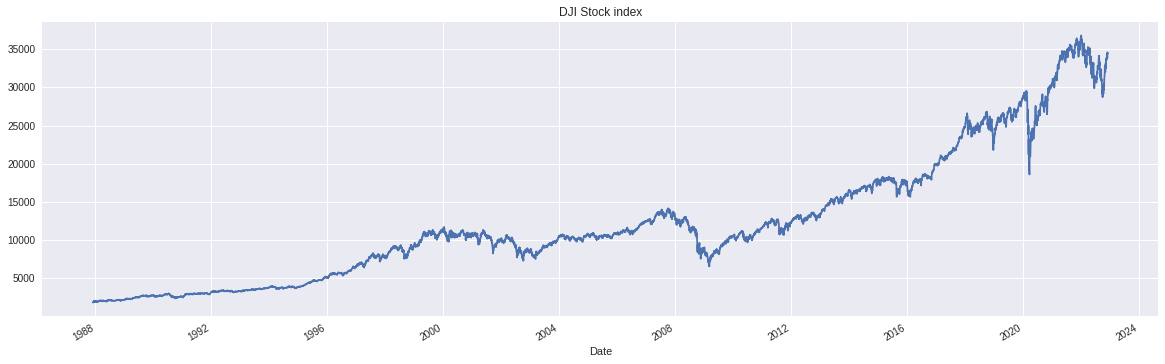

In [ ]:
macro_indicators['DJI']['Close'].plot.line(figsize=(20,6), grid = True, title='DJI Stock index')

plt.show()

#### Visualize Stock Indeces - Together for comparison

[*********************100%***********************]  3 of 3 completed


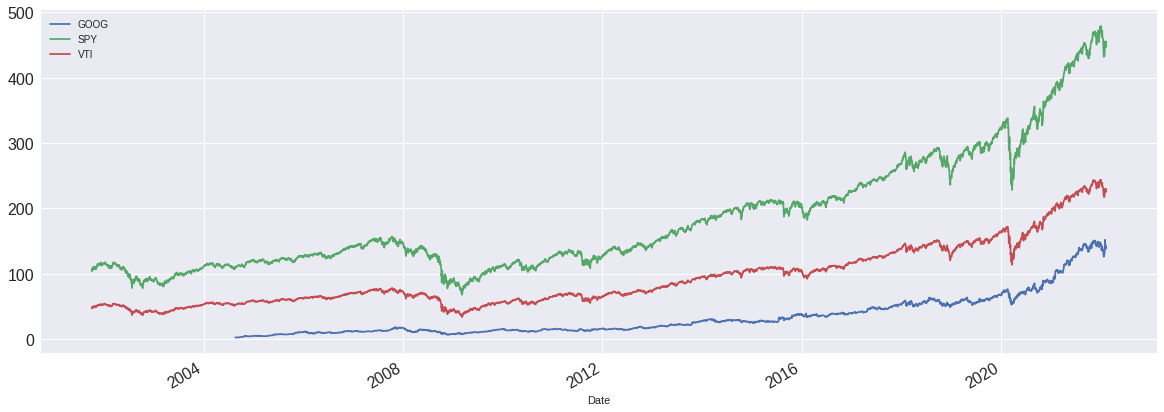

In [ ]:
stock = ["SPY","VTI","GOOG"]
stock_data = yf.download(stock,start="2001-10-01", end="2022-02-14")

data = stock_data.loc[:,"Open"].copy()
data.plot(figsize=(20,7), fontsize = 16)
matplt.style.use("seaborn")
matplt.show()

**Comments**: 

SPY is the standard index we are going to use to compare against other standard stocks. 

VTI is also considered as an index for the entire US stock market. So, we are using it to assess the overall health of the market along with top performing equities under SPY index.

Google stock has seen a uptrend over past 20 years with over 100 times return and less volatility.

### We have plotted the trend of few more economic indicators

#### Gold ETF Volatility Index

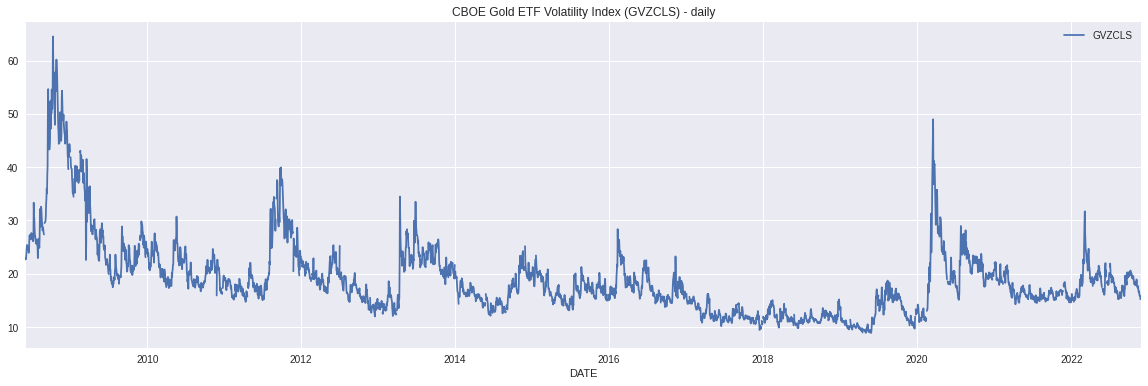

In [ ]:
# https://fred.stlouisfed.org/series/GVZCLS
macro_indicators['GVZCLS'].plot.line(figsize=(20,6), grid = True, title='CBOE Gold ETF Volatility Index (GVZCLS) - daily')
plt.show()

#### Volatility Index

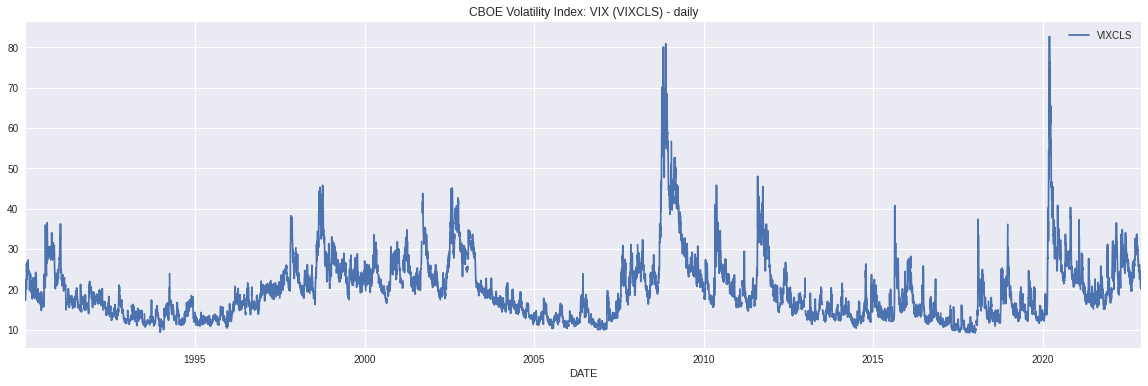

In [ ]:
# https://fred.stlouisfed.org/series/VIXCLS
macro_indicators['VIXCLS'].plot.line(figsize=(20,6), grid = True, title='CBOE Volatility Index: VIX (VIXCLS) - daily')
plt.show()

#### Financial Stress Index

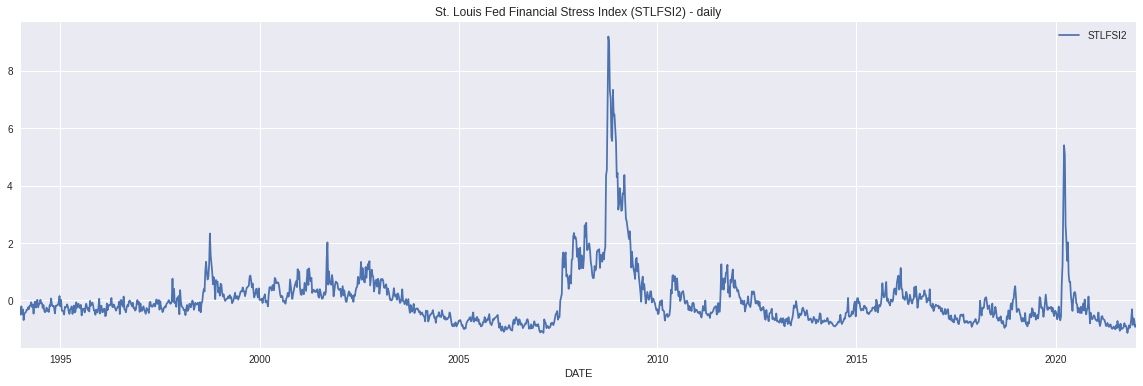

In [ ]:
# https://fred.stlouisfed.org/series/STLFSI2
macro_indicators['STLFSI2'].plot.line(figsize=(20,6), grid = True, title='St. Louis Fed Financial Stress Index (STLFSI2) - daily')
plt.show()

#### Household Financial Obligations as a Percent of Disposable Personal Income

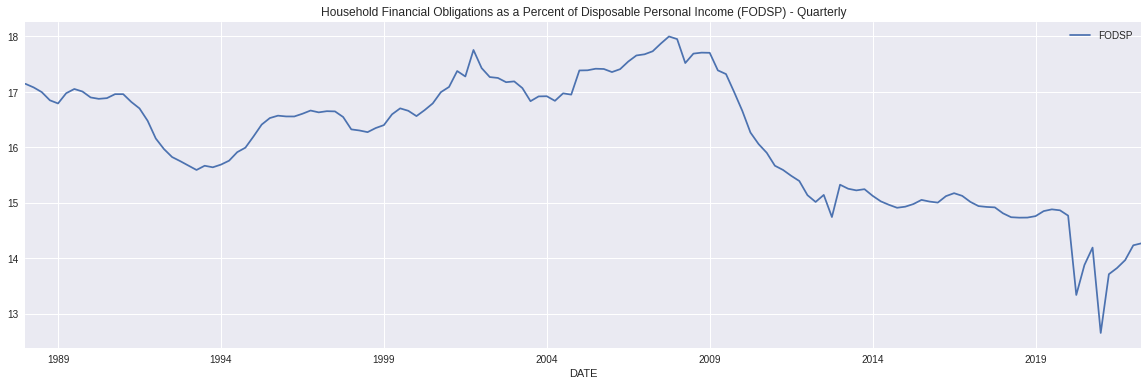

In [ ]:
# https://fred.stlouisfed.org/series/FODSP
macro_indicators['FODSP'].plot.line(figsize=(20,6), grid = True, 
                                    title='Household Financial Obligations as a Percent of Disposable Personal Income (FODSP) - Quarterly')
plt.show()    

#### Shiller PE Ratio

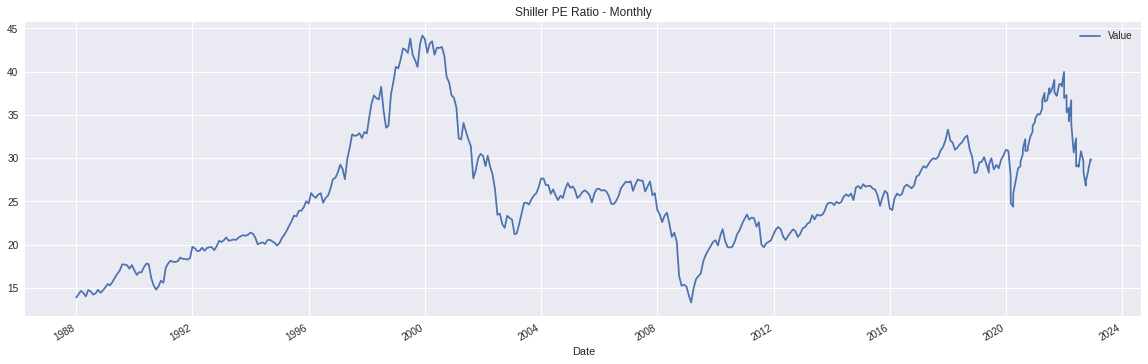

In [ ]:
# https://www.multpl.com/shiller-pe
# https://data.nasdaq.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-shiller-pe-ratio-by-month
macro_indicators['MULTPL_SHILLER_PE_RATIO_MONTH'].plot.line(figsize=(20,6), grid = True, title='Shiller PE Ratio - Monthly')
plt.show()

#### All Employees, Manufacturing Index

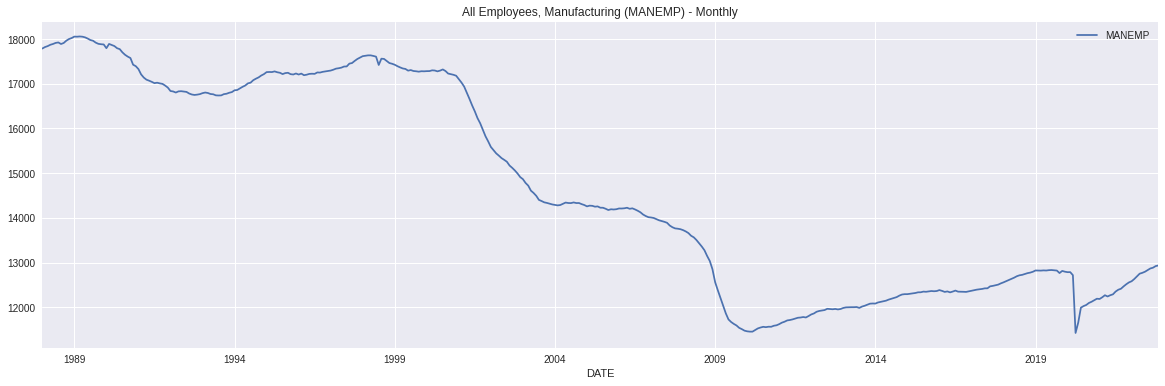

In [ ]:
# https://fred.stlouisfed.org/series/MANEMP
macro_indicators['MANEMP'].plot.line(figsize=(20,6), grid = True, title='All Employees, Manufacturing (MANEMP) - Monthly')
plt.show()

#### All Macro Indicators - Extracted

In [ ]:
for i in macro_indicators.keys():
  print(i)

GDP
GDPC1
GDPPOT
NYGDPMKTPCDWLD
CPIAUCSL
CPILFESL
GDPDEF
M1SL
WM1NS
WM2NS
M1V
M2V
WALCL
DFF
DTB3
DGS5
DGS10
DGS30
T5YIE
T10YIE
T5YIFR
TEDRATE
DPRIME
UNRATE
NROU
CIVPART
EMRATIO
UNEMPLOY
PAYEMS
MANEMP
ICSA
IC4WSA
CDSP
MDSP
FODSP
DSPIC96
PCE
PCEDG
PSAVERT
DSPI
RSXFS
INDPRO
TCU
HOUST
GPDI
CP
STLFSI2
DCOILWTICO
DTWEXAFEGS
DTWEXBGS
GFDEBTN
GFDEGDQ188S
DEXUSEU
GVZCLS
VIXCLS
DIVIDEND
MORTGAGE30US
SPCS20RSA
USTREASURY_YIELD
LBMA_GOLD
USTREASURY_REALYIELD
MULTPL_SHILLER_PE_RATIO_MONTH
BCHAIN_MKPRU
SPX
DJI


## Data Transformations

### Stationarize the Time series by deriving - DoD, WoW, MoM, YoY Growth/Return

Non-stationary time series are difficult for modeling unless we smoothen the time series. For example factors like GDP, SPX are always growing exponentially and we can't include them unchanged in the dataframe. This is unlike 'stationary' indicators like Mortgage rates (usually, 1-5% rate) or Savings rates (usually, 10%-30% of the total household income). If you add those factors without any transformation, you will receive bad results during the prediction phase, as any model will learn on small levels during the first years and won't know what to predict when the input data is too high (due to it never seeing those high levels during the training phase). That's why the 'growth' transformations are introduced for all non-stationary time series. These are Day-on-Day (DoD), Week-on-Week (WoW), Month-on-Month (MoM), Quarter-on-Quarter (QoQ), Year-on-Year (YoY) growth rates in percentage. We used get_macro_shift_transformation function to compute these values.

In [ ]:
def get_macro_shift_transformation(macro_indicators_dict):
        """Add shifted (growth) values to the data_repo.macro_indicators before joining them together, remove non-stationary time series"""
        
        # Transform daily stats on this shift
        HISTORICAL_PERIODS_DAYS = [1, 3, 7, 30, 90, 365]
        
        # Different types of transformations for daily, weekly, monthly, indicators
        DoD_ind = [k for (k, v) in INDICATORS_PERIODS.items() if v == 'D']
        WoW_ind = [k for (k, v) in INDICATORS_PERIODS.items() if v == 'W']
        MoM_ind = [k for (k, v) in INDICATORS_PERIODS.items() if v == 'M']
        QoQ_ind = [k for (k, v) in INDICATORS_PERIODS.items() if v == 'Q']
        YoY_ind = [k for (k, v) in INDICATORS_PERIODS.items() if v == 'Y']

        # rename and drop some columns (especially from QUANDL)
        macro_indicators_dict['BCHAIN_MKPRU'].rename(columns={'Value': 'BCHAIN_MKPRU'}, inplace=True)
        macro_indicators_dict['MULTPL_SHILLER_PE_RATIO_MONTH'].rename(columns={'Value': 'MULTPL_SHILLER_PE_RATIO_MONTH'}, inplace=True)
        
        #  GOLD PRICE == evening (PM) value in USD on London Stock Exchange, drop all other columns
        macro_indicators_dict['LBMA_GOLD'].rename(columns={'USD (PM)': 'LBMA_GOLD'}, inplace=True)
        macro_indicators_dict['LBMA_GOLD'].drop(['USD (AM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)'], axis=1, inplace=True)
        
        # INDEXES: leave only Close price
        macro_indicators_dict['SPX'].drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
        macro_indicators_dict['SPX'].rename(columns={'Close': 'SPX'}, inplace=True)
        macro_indicators_dict['DJI'].drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
        macro_indicators_dict['DJI'].rename(columns={'Close': 'DJI'}, inplace=True)

        for ind in DoD_ind:
            # do transform only if oil_prices, blockchain_prices, gold_prices, indexes
            if not ind in {'DCOILWTICO', 'BCHAIN_MKPRU', 'LBMA_GOLD','SPX','DJI'}:
                continue
            # treat those as an index
            for i in HISTORICAL_PERIODS_DAYS:
                df = macro_indicators_dict[ind]
                ind_transformed = ind + '_growth_' + str(i)+'d'
                df[ind_transformed] = df[ind]/df[ind].shift(i)-1

        # future growth stats
        for ind in ['SPX','DJI']:
          for i in HISTORICAL_PERIODS_DAYS:
            df = macro_indicators_dict[ind]
            ind_transformed = ind + '_future_growth_' + str(i)+'d'
            df[ind_transformed] = df[ind].shift(-i-1)/df[ind].shift(-1)-1

        for ind in WoW_ind:
            df = macro_indicators_dict[ind]
            ind_transformed = ind + '_wow'
            df[ind_transformed] = df[ind]/df[ind].shift(1)-1
            ind_transformed = ind + '_mom'
            df[ind_transformed] = df[ind]/df[ind].shift(5)-1
            # drop original "ind" column if series are non-stationary
            # do not drop original ind for FinStressIndex (STLFSI2), and Long-term Mortgage rates
            if not ind in {'STLFSI2', 'MORTGAGE30US'}:
                macro_indicators_dict[ind].drop(
                    [ind], axis=1, inplace=True)

        for ind in MoM_ind:
            df = macro_indicators_dict[ind]
            ind_transformed = ind + '_mom'
            df[ind_transformed] = df[ind]/df[ind].shift(1)-1
            ind_transformed = ind + '_yoy'
            df[ind_transformed] = df[ind]/df[ind].shift(12)-1
            # drop original "ind" column if series are non-stationary
            # do not drop original ind for all indicators that are 'ratios' or 'percentages'
            if not ind in {'UNRATE', 'CIVPART', 'EMRATIO', 'PSAVERT', 'INDPRO', 'TCU', 'SPCS20RSA', 'MULTPL_SHILLER_PE_RATIO_MONTH'}:
                macro_indicators_dict[ind].drop(
                    [ind], axis=1, inplace=True)

        # create one field as div_ratio (% of profits paid as dividents)
        macro_indicators_dict['CP'] = macro_indicators_dict['CP'].join(
            macro_indicators_dict['DIVIDEND'])
        macro_indicators_dict['CP']['div_ratio'] = macro_indicators_dict['CP']['DIVIDEND'] / \
            macro_indicators_dict['CP']['CP']
        macro_indicators_dict['CP'].drop(
            ['DIVIDEND'], axis=1, inplace=True)

        for ind in QoQ_ind:
            df = macro_indicators_dict[ind]
            ind_transformed = ind + '_qoq'
            df[ind_transformed] = df[ind]/df[ind].shift(1)-1
            ind_transformed = ind + '_yoy'
            df[ind_transformed] = df[ind]/df[ind].shift(4)-1
            # drop original "ind" column if series are non-stationary
            # do not drop original ind for all indicators that are 'ratios' or 'percentages'
            if not ind in {'GDPDEF', 'M1V', 'M2V', 'NROU', 'CDSP', 'MDSP', 'FODSP', 'GFDEGDQ188S'}:
                macro_indicators_dict[ind].drop(
                    [ind], axis=1, inplace=True)

        for ind in YoY_ind:
            df = macro_indicators_dict[ind]
            ind_transformed = ind + '_yoy'
            df[ind_transformed] = df[ind]/df[ind].shift(1)-1
            macro_indicators_dict[ind].drop([ind], axis=1, inplace=True)

macro_indicators_dict = copy.deepcopy(macro_indicators)        
get_macro_shift_transformation(macro_indicators_dict)

#### Sample Data After Transformation

In [ ]:
macro_indicators_dict['LBMA_GOLD'].tail(5)

,LBMA_GOLD,LBMA_GOLD_growth_1d,LBMA_GOLD_growth_3d,LBMA_GOLD_growth_7d,LBMA_GOLD_growth_30d,LBMA_GOLD_growth_90d,LBMA_GOLD_growth_365d
Date,,,,,,,
2022-11-30,1753.50,0.000456,0.000942,0.007527,0.074646,0.020129,-0.012141
2022-12-01,1803.15,0.028315,0.032407,0.034539,0.102642,0.048313,0.006447
2022-12-02,1784.75,-0.010204,0.018286,0.025630,0.086110,0.041247,-0.000056
2022-12-05,1776.80,-0.004454,0.013288,0.012191,0.077404,0.013288,-0.005513
2022-12-06,1773.80,-0.001688,-0.016277,0.012530,0.069037,0.011635,-0.003651


In [ ]:
macro_indicators_dict['SPX'].tail(5)

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2022-11-30,3957.18,4080.11,3938.58,4080.11,3.721832e+09,0.030948
2022-12-01,4087.14,4100.51,4050.87,4076.57,2.316143e+09,-0.000868
2022-12-02,4040.17,4080.48,4026.63,4071.70,2.073994e+09,-0.001195
2022-12-05,4052.02,4052.45,3984.49,3998.84,2.283039e+09,-0.017894
2022-12-06,3996.63,4001.51,3918.39,3941.26,2.362227e+09,-0.014399


In [ ]:
macro_indicators_dict['GDP'].tail(5)

,GDP_qoq,GDP_yoy
DATE,,
2021-07-01,0.021846,0.102422
2021-10-01,0.033915,0.121836
2022-01-01,0.016073,0.108750
2022-04-01,0.020533,0.095524
2022-07-01,0.017842,0.091231


In [ ]:
macro_indicators_dict['CPILFESL'].tail(5)

,CPILFESL_mom,CPILFESL_yoy
DATE,,
2022-06-01,0.007065,0.059125
2022-07-01,0.003129,0.059115
2022-08-01,0.005673,0.063171
2022-09-01,0.005759,0.066578
2022-10-01,0.002715,0.063066


In [ ]:
macro_indicators_dict['NYGDPMKTPCDWLD'].tail(1)

,NYGDPMKTPCDWLD_yoy
DATE,
2021-01-01,0.13183


#### Prepare Dataset - Join various indicators using date index

All the factors are recorded at various frequencies. We want these values on a daily frequency for modeling purpose. Here we are interpolating the last recorded value to repeat for the dates till the next recorded value. After this we are able to join factors like GDP, CPI, etc. to a daily time series like SPX, DJI, VIX, etc.  

In [ ]:
dates = pd.DataFrame(macro_indicators_dict['SPX'].index.sort_values().unique(), columns=['Date'])

In [ ]:
def get_daily_macro_stats_df(daily_df, macro_ind_df, regime='LAST'):
        """take Time from daily_df, and apply that to macro_ind_df, (LAST=take last observation, PREVIOUS=take previous) """
        ticker_dates = daily_df.Date.sort_values().unique()
        new_column_dict = {}

        for elem in ticker_dates:
            ts = pd.to_datetime(str(elem))
            d = ts.strftime('%Y-%m-%d')
            # all potential records to merge
            options_to_merge = macro_ind_df[macro_ind_df.index <= d]
            if len(options_to_merge) == 0:
                continue
            last_value = options_to_merge.tail(1).values.tolist()[0]
            prev_value = options_to_merge.tail(2).values.tolist()[0]
            if regime == 'PREVIOUS':
                if prev_value is not None:
                    new_column_dict[d] = prev_value
            elif regime == 'LAST':
                if last_value is not None:
                    new_column_dict[d] = last_value
            else:
                raise("Regime should be in ('PREVIOUS','LAST')")
        return pd.DataFrame.from_dict(new_column_dict, orient='index', columns = options_to_merge.keys())

# 2) Create a DAILY macro stats dataset
# Different types of joins for daily, weekly, monthly, indicators
  # join on the last available date
lastday_ind = [k for (k, v) in INDICATORS_PERIODS.items() if v not in ('M', 'Q', 'Y')]
  # join on the previous available date (M,Q,Y stats write say '2021-01-01' - but they represent the whole M,Q,Y STARTING at this date)
firstday_ind = [k for (k, v) in INDICATORS_PERIODS.items() if v in ('M', 'Q', 'Y')]

  # start from all dates we need to have macro stats
dates = pd.DataFrame(macro_indicators_dict['SPX'].index.sort_values().unique(), columns=['Date'])

macro_data_df = None
# iterate over all transformed series in self.macro_indicators_dict and join one by one
# all non-Monthly indicators are
tq_last_day = tqdm(lastday_ind)
tq_last_day.set_description("Merging LAST Day indicators")
for ind in tq_last_day:
  # do not add some indicators to the final dataset (they are duplicated in another datasource)
  if ind in ('USTREASURY_YIELD', 'USTREASURY_REALYIELD'):
    continue
  df_to_merge = get_daily_macro_stats_df(dates, macro_indicators_dict[ind], regime='LAST')
  if macro_data_df is None:
    macro_data_df = df_to_merge
  else:
    macro_data_df = macro_data_df.join(df_to_merge)

tq_first_day = tqdm(firstday_ind)
tq_first_day.set_description("Merging FIRST Day indicators")
#  some stats  have first day of period date (e.g. '2020-06-01' instead of '2020-06-30'), so we need to get PREVIOUS available macro param
for ind in tq_first_day:
  df_to_merge = get_daily_macro_stats_df(dates, macro_indicators_dict[ind], regime='PREVIOUS')
  if macro_data_df is None:
    macro_data_df = df_to_merge
  else:
    macro_data_df = macro_data_df.join(df_to_merge)
     

Merging FIRST Day indicators: 100%|██████████| 36/36 [02:43<00:00,  4.55s/it]


In [ ]:
macro_data_df.head()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
1987-12-07,NaN,NaN,NaN,NaN,NaN,NaN,6.93,5.82,8.48,9.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-08,NaN,NaN,NaN,NaN,NaN,NaN,6.79,5.86,8.49,9.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-09,NaN,NaN,NaN,NaN,NaN,NaN,6.72,5.83,8.47,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-10,NaN,NaN,NaN,NaN,NaN,NaN,6.83,5.92,8.63,9.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-11,NaN,NaN,NaN,NaN,NaN,NaN,6.81,5.86,8.65,9.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
macro_data_df.tail(5)

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,DGS30,T5YIE,T10YIE,T5YIFR,TEDRATE,DPRIME,ICSA_wow,ICSA_mom,IC4WSA_wow,IC4WSA_mom,STLFSI2,STLFSI2_wow,STLFSI2_mom,DCOILWTICO,DCOILWTICO_growth_1d,DCOILWTICO_growth_3d,DCOILWTICO_growth_7d,DCOILWTICO_growth_30d,DCOILWTICO_growth_90d,DCOILWTICO_growth_365d,DTWEXAFEGS,DTWEXBGS,DEXUSEU,GVZCLS,VIXCLS,MORTGAGE30US,MORTGAGE30US_wow,MORTGAGE30US_mom,BCHAIN_MKPRU,BCHAIN_MKPRU_growth_1d,BCHAIN_MKPRU_growth_3d,BCHAIN_MKPRU_growth_7d,BCHAIN_MKPRU_growth_30d,BCHAIN_MKPRU_growth_90d,BCHAIN_MKPRU_growth_365d,LBMA_GOLD,LBMA_GOLD_growth_1d,LBMA_GOLD_growth_3d,LBMA_GOLD_growth_7d,LBMA_GOLD_growth_30d,...,MANEMP_mom,MANEMP_yoy,CDSP,CDSP_qoq,CDSP_yoy,MDSP,MDSP_qoq,MDSP_yoy,FODSP,FODSP_qoq,FODSP_yoy,DSPIC96_mom,DSPIC96_yoy,PCE_mom,PCE_yoy,PCEDG_mom,PCEDG_yoy,PSAVERT,PSAVERT_mom,PSAVERT_yoy,DSPI_mom,DSPI_yoy,RSXFS_mom,RSXFS_yoy,INDPRO,INDPRO_mom,INDPRO_yoy,TCU,TCU_mom,TCU_yoy,HOUST_mom,HOUST_yoy,GPDI_qoq,GPDI_yoy,div_ratio,CP_qoq,CP_yoy,GFDEBTN_qoq,GFDEBTN_yoy,GFDEGDQ188S,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
2022-11-28,0.001854,-0.006159,0.002715,0.000384,-0.00049,-0.014013,3.83,4.30,3.88,3.69,3.74,2.29,2.26,2.23,0.09,7.0,-0.06639,0.03211,0.007709,0.04333,-0.8509,-0.07531,1.784359,77.1,0.008502,-0.010651,-0.056188,-0.103488,-0.227687,NaN,117.6993,123.4863,1.0402,15.77,22.21,6.58,-0.004539,-0.051873,16420.20,-0.002022,-0.010394,0.009827,-0.202966,-0.190741,-0.700368,1746.55,-0.003025,0.003678,-0.006852,0.049137,...,0.002794,0.036419,5.629345,0.027235,0.153878,3.892771,0.013457,0.110409,14.235896,0.01914,0.124899,-0.000239,-0.033588,0.006279,0.083612,0.004686,0.080752,2.4,-0.142857,-0.696203,0.003184,0.02702,-0.001103,0.080331,104.805,0.001439,0.049627,80.0572,0.000177,0.033704,-0.013263,-0.045542,-0.013081,0.169023,0.571929,0.074003,0.077487,0.005514,0.071475,121.071,-0.014717,-0.021952,-0.001799,0.057608,309.770591,-0.012951,0.130855,28.53,0.043144,-0.222828
2022-11-29,0.001854,-0.006159,0.002715,0.000384,-0.00049,-0.014013,3.83,4.27,3.92,3.75,3.81,2.30,2.25,2.20,0.09,7.0,-0.06639,0.03211,0.007709,0.04333,-0.8509,-0.07531,1.784359,77.1,0.008502,-0.010651,-0.056188,-0.103488,-0.227687,NaN,117.6993,123.4863,1.0402,15.71,21.89,6.58,-0.004539,-0.051873,16208.96,-0.012865,-0.018082,0.028513,-0.221328,-0.181077,-0.717083,1752.70,0.003521,-0.001538,0.000628,0.060315,...,0.002794,0.036419,5.629345,0.027235,0.153878,3.892771,0.013457,0.110409,14.235896,0.01914,0.124899,-0.000239,-0.033588,0.006279,0.083612,0.004686,0.080752,2.4,-0.142857,-0.696203,0.003184,0.02702,-0.001103,0.080331,104.805,0.001439,0.049627,80.0572,0.000177,0.033704,-0.013263,-0.045542,-0.013081,0.169023,0.571929,0.074003,0.077487,0.005514,0.071475,121.071,-0.014717,-0.021952,-0.001799,0.057608,309.770591,-0.012951,0.130855,28.53,0.043144,-0.222828
2022-11-30,0.001854,-0.006159,0.002715,0.000384,-0.00427,-0.015879,3.83,4.27,3.82,3.68,3.80,2.41,2.34,2.27,0.09,7.0,-0.06639,0.03211,0.007709,0.04333,-0.8509,-0.07531,1.784359,77.1,0.008502,-0.010651,-0.056188,-0.103488,-0.227687,NaN,117.6993,123.4863,1.0402,15.45,20.58,6.58,-0.004539,-0.051873,16432.73,0.013805,-0.001261,0.014695,-0.203397,-0.180318,-0.715837,1753.50,0.000456,0.000942,0.007527,0.074646,...,0.002794,0.036419,5.629345,0.027235,0.153878,3.892771,0.013457,0.110409,14.235896,0.01914,0.124899,-0.000239,-0.033588,0.006279,0.083612,0.004686,0.080752,2.4,-0.142857,-0.696203,0.003184,0.02702,-0.001103,0.080331,104.805,0.001439,0.049627,80.0572,0.000177,0.033704,-0.013263,-0.045542,-0.013081,0.169023,0.571929,0.074003,0.077487,0.005514,0.071475,121.071,-0.014717,-0.021952,-0.001799,0.057608,309.770591,-0.012951,0.130855,28.71,0.006309,-0.152847
2022-12-01,0.001854,-0.006159,0.002715,0.000384,-0.00427,-0.015879,3.83,4.22,3.68,3.53,3.64,2.45,2.36,2.27,0.09,7.0,-0.06639,0.03211,0.007709,0.04333,-0.8509,-0.075

In [ ]:
macro_indicators_dict['SPX'].head(5)

,SPX,daily_return,SPX_growth_1d,SPX_growth_3d,SPX_growth_7d,SPX_growth_30d,SPX_growth_90d,SPX_growth_365d,SPX_future_growth_1d,SPX_future_growth_3d,SPX_future_growth_7d,SPX_future_growth_30d,SPX_future_growth_90d,SPX_future_growth_365d
Date,,,,,,,,,,,,,,
1987-12-07,228.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016943,0.001745,0.034354,0.035035,0.103444,0.353582
1987-12-08,234.91,0.026884,0.026884,NaN,NaN,NaN,NaN,NaN,-0.022270,0.013814,0.042990,0.031856,0.079660,0.344719
1987-12-09,238.89,0.016943,0.016943,NaN,NaN,NaN,NaN,NaN,0.007492,0.039560,0.068374,0.079634,0.096588,0.378516
1987-12-10,233.57,-0.022270,-0.022270,0.021026,NaN,NaN,NaN,NaN,0.029194,0.054224,0.062171,0.060556,0.089665,0.352711
1987-12-11,235.32,0.007492,0.007492,0.001745,NaN,NaN,NaN,NaN,0.002560,0.003262,0.045295,0.029687,0.074115,0.317726


### Correlation Analysis

Given all the Macro-Economics features downloaded from FRED and joined with S&P and DowJones Index we have plotted the correlation between each other and we are having a closer look at leading factors that indicates a stock return. We have choosen a Heatmap to easily identify positively correlated factors in Green and negatively correlated factors in Brown color.


In [ ]:
macro_data_df.corr()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,DGS30,T5YIE,T10YIE,T5YIFR,TEDRATE,DPRIME,ICSA_wow,ICSA_mom,IC4WSA_wow,IC4WSA_mom,STLFSI2,STLFSI2_wow,STLFSI2_mom,DCOILWTICO,DCOILWTICO_growth_1d,DCOILWTICO_growth_3d,DCOILWTICO_growth_7d,DCOILWTICO_growth_30d,DCOILWTICO_growth_90d,DCOILWTICO_growth_365d,DTWEXAFEGS,DTWEXBGS,DEXUSEU,GVZCLS,VIXCLS,MORTGAGE30US,MORTGAGE30US_wow,MORTGAGE30US_mom,BCHAIN_MKPRU,BCHAIN_MKPRU_growth_1d,BCHAIN_MKPRU_growth_3d,BCHAIN_MKPRU_growth_7d,BCHAIN_MKPRU_growth_30d,BCHAIN_MKPRU_growth_90d,BCHAIN_MKPRU_growth_365d,LBMA_GOLD,LBMA_GOLD_growth_1d,LBMA_GOLD_growth_3d,LBMA_GOLD_growth_7d,LBMA_GOLD_growth_30d,...,MANEMP_mom,MANEMP_yoy,CDSP,CDSP_qoq,CDSP_yoy,MDSP,MDSP_qoq,MDSP_yoy,FODSP,FODSP_qoq,FODSP_yoy,DSPIC96_mom,DSPIC96_yoy,PCE_mom,PCE_yoy,PCEDG_mom,PCEDG_yoy,PSAVERT,PSAVERT_mom,PSAVERT_yoy,DSPI_mom,DSPI_yoy,RSXFS_mom,RSXFS_yoy,INDPRO,INDPRO_mom,INDPRO_yoy,TCU,TCU_mom,TCU_yoy,HOUST_mom,HOUST_yoy,GPDI_qoq,GPDI_yoy,div_ratio,CP_qoq,CP_yoy,GFDEBTN_qoq,GFDEBTN_yoy,GFDEGDQ188S,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
WM1NS_wow,1.000000,0.460185,0.025708,0.147138,0.041927,0.098315,-0.038386,-0.039563,-0.048316,-0.052263,-0.053298,-0.076454,-0.084667,-0.072597,-0.001383,-0.039708,0.018298,0.020062,-0.002796,0.035967,0.038959,0.013679,0.003311,-0.013767,0.019789,0.080960,0.205852,0.029266,-0.058035,-0.043797,0.045343,0.060962,-0.013819,0.046595,0.051356,-0.040702,-0.008841,-0.028291,0.004514,0.008876,0.014109,0.023763,0.000866,-0.016904,-0.003054,0.045545,0.005618,0.004509,-0.000459,0.045623,...,-0.351048,-0.069197,0.000753,-0.007793,-0.002073,-0.039006,-0.010725,-0.013179,-0.033296,-0.007135,-0.006391,0.167213,0.101083,-0.282201,-0.149693,-0.100786,-0.071696,0.199706,0.191064,0.181397,0.157672,0.090950,-0.183220,-0.099020,-0.000088,-0.287432,-0.103423,-0.093197,-0.280767,-0.093186,-0.077402,-0.032064,-0.015813,-0.021617,0.035933,-0.019586,-0.014995,-0.025944,-0.004549,0.037835,0.000802,0.007953,-0.015607,-0.007744,0.027522,-0.005780,-0.008685,-0.000129,0.026438,-0.018013
WM1NS_mom,0.460185,1.000000,0.051269,0.326346,0.092989,0.167428,-0.087350,-0.087776,-0.107728,-0.115628,-0.116221,-0.161829,-0.186245,-0.170467,-0.019904,-0.088906,0.001225,0.041197,-0.043688,0.052273,0.060375,0.003240,-0.002812,-0.022257,0.022204,0.087911,0.200309,0.166068,-0.122884,-0.074818,0.097474,0.130345,-0.028276,0.051989,0.091660,-0.096180,-0.024382,-0.042106,0.011157,0.003784,-0.007249,0.004124,0.008114,-0.024292,-0.015653,0.112626,0.000344,0.001758,0.008431,0.053305,...,-0.651744,-0.161790,-0.000936,-0.021528,-0.006217,-0.092752,-0.029375,-0.032944,-0.080261,-0.020609,-0.016946,0.310987,0.227165,-0.472781,-0.340206,-0.098500,-0.143975,0.457653,0.372112,0.414841,0.290301,0.201109,-0.252969,-0.208586,-0.001611,-0.552508,-0.247545,-0.219789,-0.537450,-0.224373,-0.133058,-0.074985,-0.038730,-0.051932,0.090910,-0.052858,-0.036876,-0.051409,-0.009648,0.090479,0.010419,0.020269,-0.032459,-0.017562,0.062603,-0.018881,-0.023847,0.000347,0.061001,-0.042805
WM2NS_wow,0.025708,0.051269,1.000000,0.525166,0.105634,0.116152,-0.040402,-0.041012,-0.063158,-0.065229,-0.064848,-0.092853,-0.106353,-0.096660,0.030720,-0.034636,0.095039,0.129530,0.120007,0.104165,0.099241,-0.005496,-0.001562,-0.005177,-0.028239,-0.027407,-0.013048,-0.057105,-0.064832,-0.042445,0.030682,0.049170,-0.014739,0.118295,0.114037,-0.053943,-0.005603,-0.017314,0.034015,0.012805,0.022564,0.028762,0.012099,0.037071,-0.018796,0.043639,0.009183,0.015739,0.011114,0.010375,...,-0.047761,-0.016571,0.026378,0.019611,-0.003103,-0.031619,0.016213,-0.019561,-0.020521,0.019274,-0.018922,-0.004116,0.036745,-0.062640,-0.048927,-0.015963,-0.003320,0.050203,0.023802,0.060691,-0.009621,0.024389,-0.032335,-0.025847,0.042301,-0.062742,-0.045538,-0.045955,-0.059864,-0.041574,-0.015959,0.003657,-0.002719,-0.016752,0.

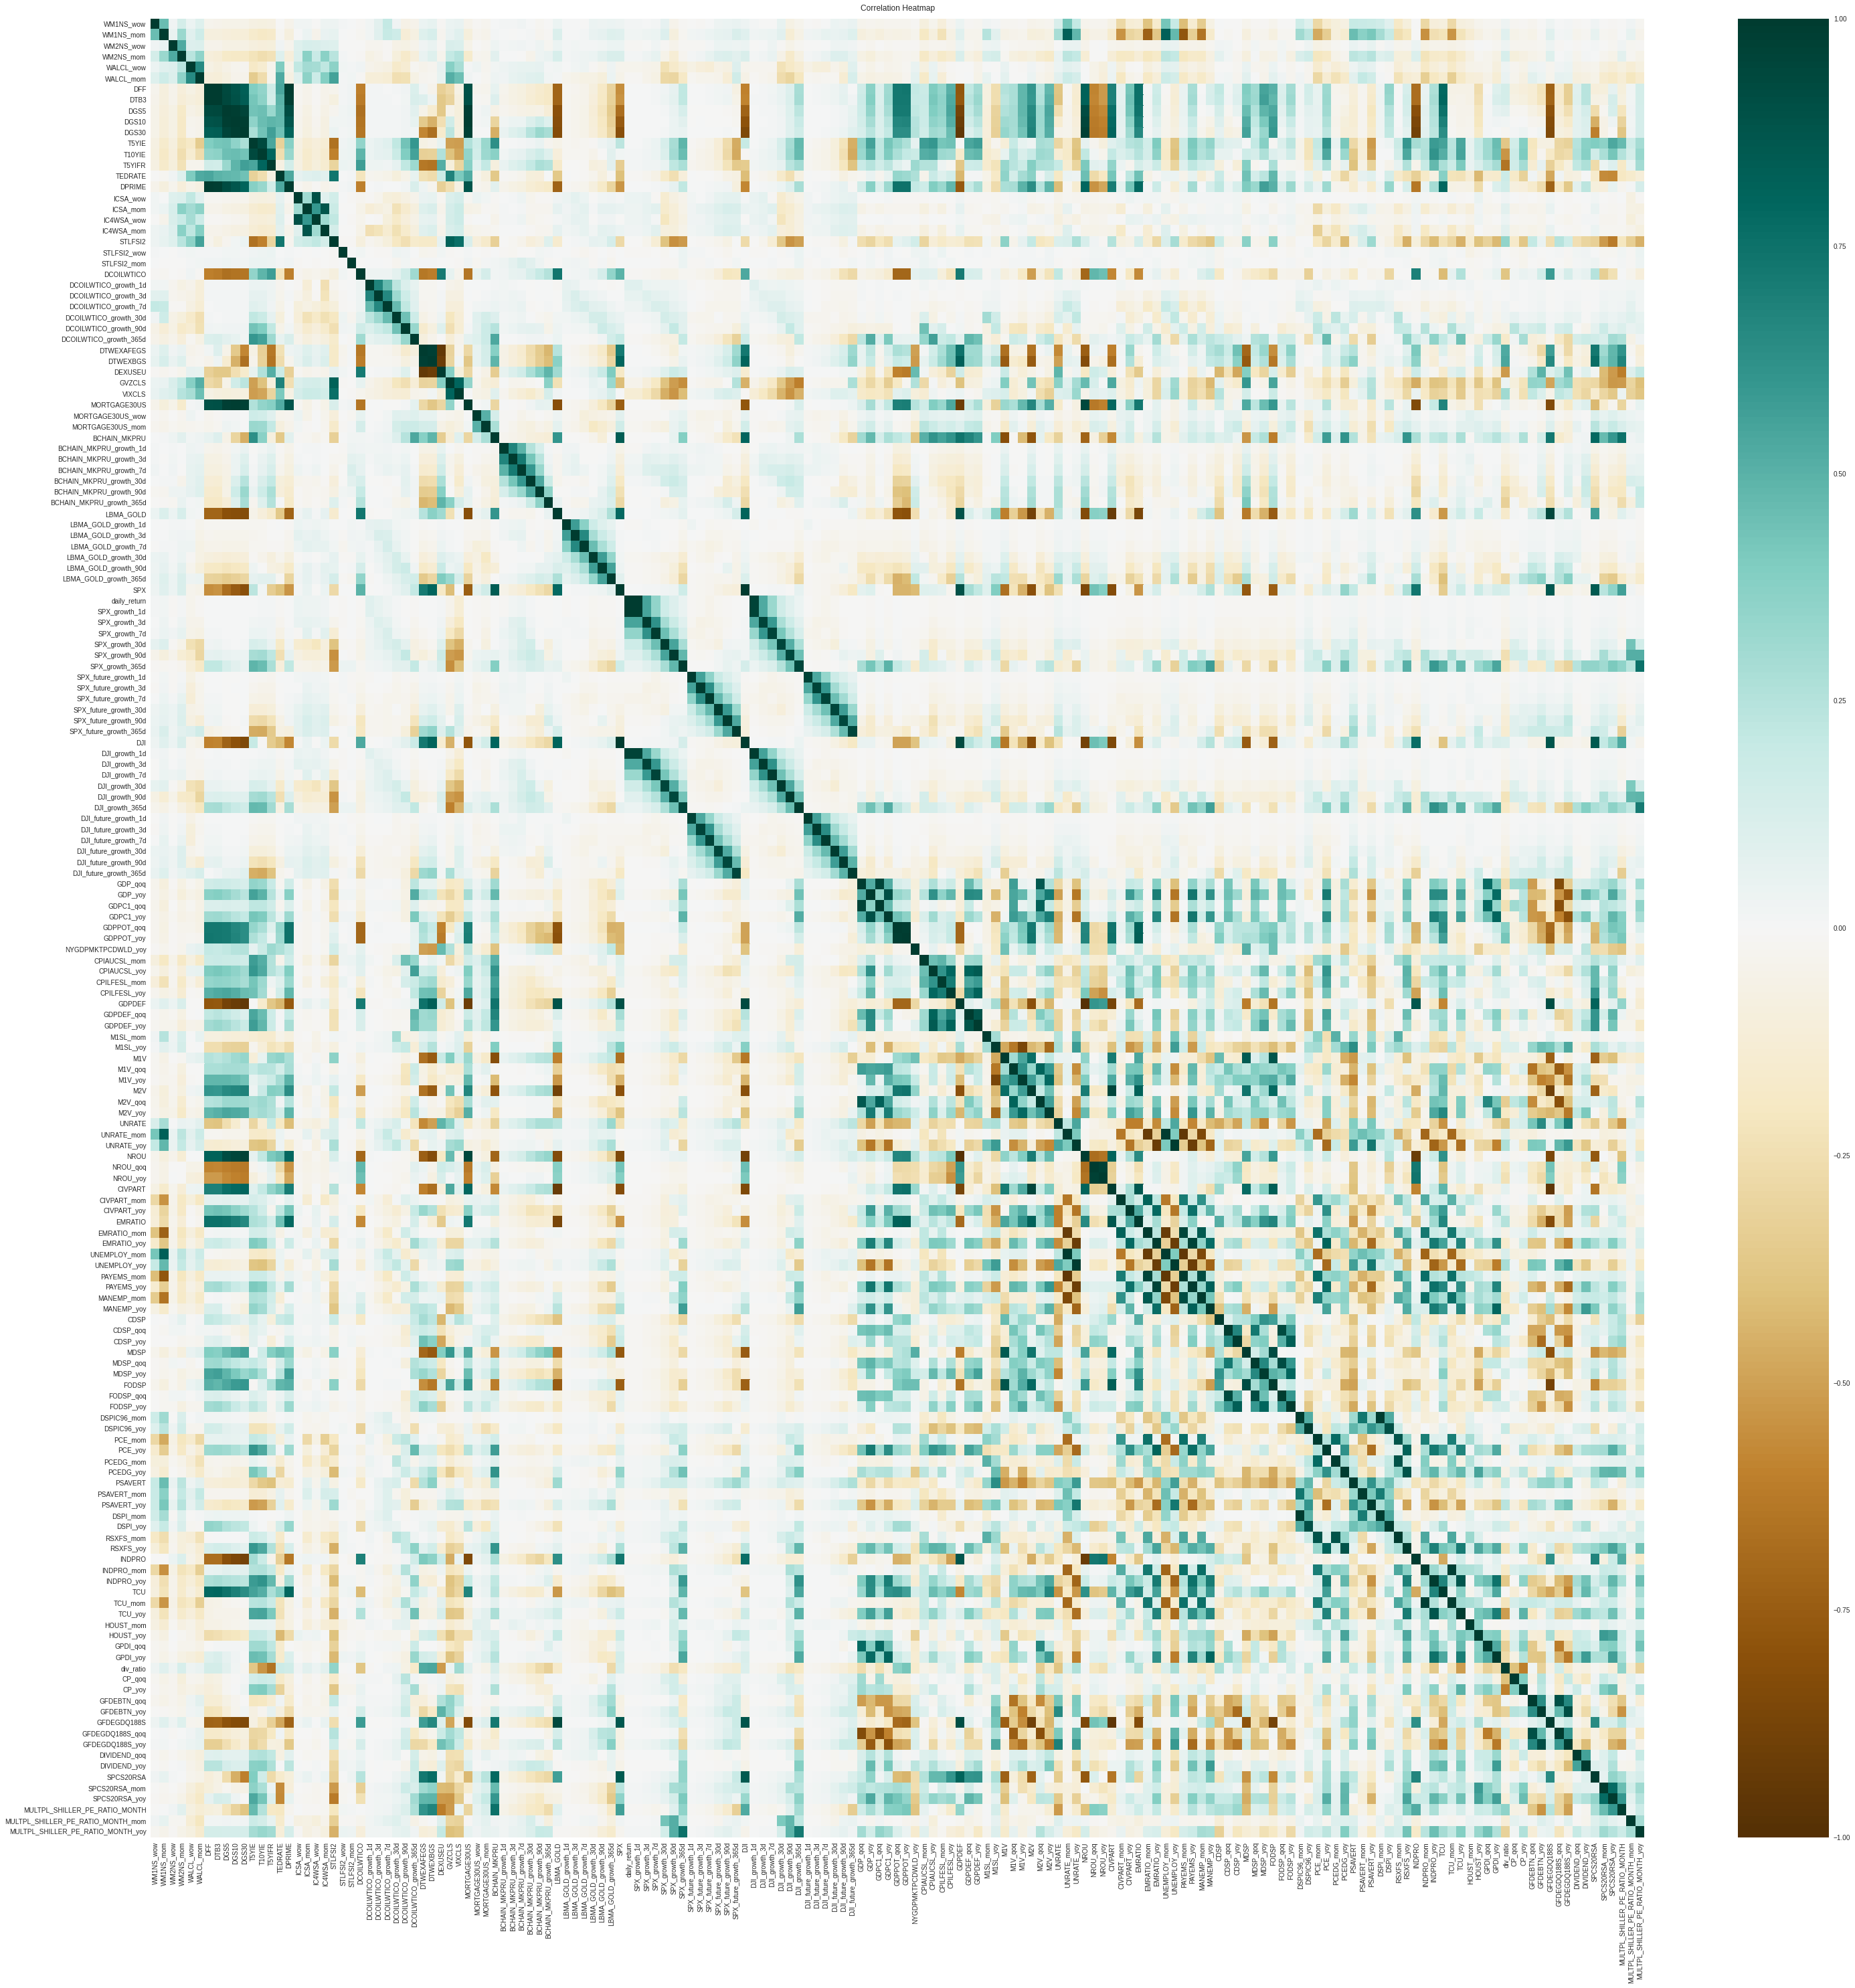

In [ ]:
plt.figure(figsize=(50,50))
heatmap = sns.heatmap(macro_data_df.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

#### SPY - Highly Correlated Factors

Out of all the one-to-one correlation we wanted to learn about positive or negatively correlated factors affecting S&P. So, we are filtering all the factors above 0.5 and below 0.5 threshold. We have chosen to use a simple bar chart to explain below.

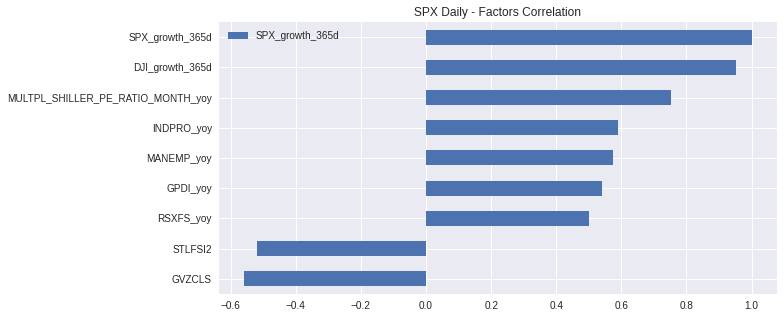

In [ ]:
SPX_growth_365d_corr = pd.DataFrame(macro_data_df.corr()['SPX_growth_365d'].sort_values())

filter = np.abs(SPX_growth_365d_corr.SPX_growth_365d)>=0.5
SPX_growth_365d_corr[filter].plot.barh(figsize=(10,5), grid=True)
plt.title('SPX Daily - Factors Correlation')
plt.show()

#### Observation

Most negatively correlated factors: 

* GVZCLS (CBOE Gold ETF Volatility Index)
* STLFSI2 (St. Louis Fed Financial Stress Index)
* FODSP (Household Financial Obligations as a Percent of Disposable Personal Income)
* VIXCLS (CBOE Volatility Index VIX)
* CDSP (Consumer Debt Service Payments as a Percent of Disposable Personal Income)

Most positively correlated factors: 

* INDPRO_yoy (Industrial Production YoY growth) 
* MANEMP_yoy (All Employees in Manufacturing YoY)
* MULTPL_SHILLER_PE_RATIO_MONTH_yoy (Shiller PE Ratio YoY growth)
* DJI_growth_365d (Dow Jones Industrial Average 365d growth)

#### DJI - Highly Correlated Factors

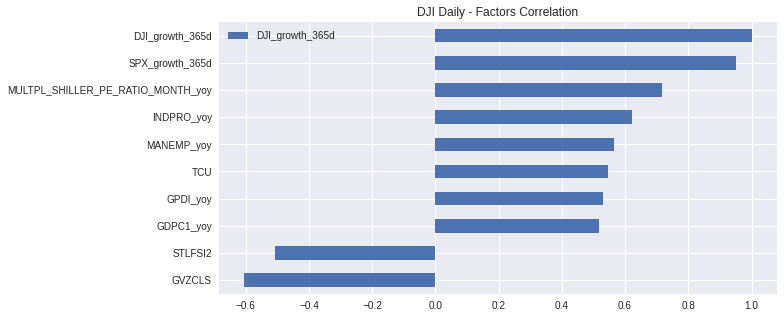

In [ ]:
DJI_growth_365d_corr = pd.DataFrame(macro_data_df.corr()['DJI_growth_365d'].sort_values())

filter = np.abs(DJI_growth_365d_corr.DJI_growth_365d)>=0.5
DJI_growth_365d_corr[filter].plot.barh(figsize=(10,5), grid=True)
plt.title('DJI Daily - Factors Correlation')
plt.show()

### Future growth indicators

In [ ]:
future_ind = []
for ind in macro_data_df.keys():
  if 'future' in ind:
    future_ind.append(ind)
  
print(future_ind)

['SPX_future_growth_1d', 'SPX_future_growth_3d', 'SPX_future_growth_7d', 'SPX_future_growth_30d', 'SPX_future_growth_90d', 'SPX_future_growth_365d', 'DJI_future_growth_1d', 'DJI_future_growth_3d', 'DJI_future_growth_7d', 'DJI_future_growth_30d', 'DJI_future_growth_90d', 'DJI_future_growth_365d']


In [ ]:
# include all features 
macro_df_no_future_ind = macro_data_df.keys()
# do not use future_ind in the list to find correlations with the label (which is a future_indicator)
macro_df_no_future_ind = macro_df_no_future_ind.drop(future_ind)  

In [ ]:
macro_data_df.corr()['SPX_future_growth_365d'][macro_df_no_future_ind].sort_values()

T10YIE                          -0.468694
T5YIE                           -0.462198
M1V                             -0.359750
T5YIFR                          -0.357810
MULTPL_SHILLER_PE_RATIO_MONTH   -0.327849
                                   ...   
UNRATE                           0.247293
GVZCLS                           0.253047
DTWEXAFEGS                       0.307364
PSAVERT                          0.316174
DTWEXBGS                         0.357337
Name: SPX_future_growth_365d, Length: 155, dtype: float64

### Decision Tree for Features Importance

Here, we are looking to apply Machine Learning to forecast
and understand important factors. 

The Correlation analysis which gave us a high level idea on factors to include/remove, but this may not be good enough for the simple reason that those features can be correlated between each other and, thus, an analyst can't identify what causes the change of an index in the first place. With this problem in mind, we'll find the marginal impact of each individual indicator and rank them accordingly. Decision Tree is a suitable modeling technique for quickly predicting the future growth of S&P 500 (90 days) and to understand the features' importance.





In [ ]:
# all features should be numeric
for key in macro_data_df.keys():
  macro_data_df[key] = macro_data_df[key].astype(float)

# include all features 
X_keys = macro_data_df.keys()
# do not use future ind to predict
X_keys = X_keys.drop(future_ind)

# deep copy of the dataframe not to change the original df
macro_copy = macro_data_df.copy(deep=True)

# replace bad values with np.nan
macro_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
     
macro_copy.fillna(0,inplace=True)

X = macro_copy[X_keys]
#get all features in X and dependent variable in y
y = macro_copy['SPX_future_growth_90d']

In [ ]:
# define a function that returns an ordered dictionary of features, sorted by importance
def get_importance_features(model):
  importance = model.feature_importances_
  feat_imp = OrderedDict()
  # summarize feature importance
  for i,v in enumerate(importance):
    feat_imp[X.keys()[i]] = importance[i] 
  sorted_feat_imp = sorted(feat_imp.items(), key=lambda kv: kv[1])

  return sorted_feat_imp

#### List top 10 important features considered by the Decision Tree

M1, CDSP, VIX, CIV, TCU

In [ ]:
# init the class and fit the model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)

decision_feat_imp = get_importance_features(decision_tree_model)

# Prediction of SPX_future_growth_90d:
decision_feat_imp[-10:]

[('CP_qoq', 0.02994177701316576),
 ('PSAVERT_yoy', 0.037486635576264304),
 ('NYGDPMKTPCDWLD_yoy', 0.040611060251545275),
 ('SPX', 0.04279237814165622),
 ('TCU', 0.0450476333936911),
 ('CIVPART_yoy', 0.04877241216006374),
 ('VIXCLS', 0.06530911079094907),
 ('CDSP', 0.0721950977150387),
 ('GFDEGDQ188S_yoy', 0.08565121520249919),
 ('M1V', 0.15395787085733312)]

#### Create Train & Test datasets to Train and Evaluate the model

Here, we considered to test against recent 20% dates without any shuffling of the time series data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# define the model
decision_tree_model2 = DecisionTreeRegressor()
decision_tree_model2.fit(X_train, y_train)

decision_feat_imp2 = get_importance_features(decision_tree_model2)

decision_feat_imp2[-10:]

[('DJI', 0.01943352957805173),
 ('GDPDEF_qoq', 0.02899394703017508),
 ('CP_qoq', 0.03634180566491764),
 ('FODSP_yoy', 0.038551471757421074),
 ('TCU', 0.057697860989439104),
 ('VIXCLS', 0.05935063769970815),
 ('CIVPART_yoy', 0.06221617709949202),
 ('GFDEGDQ188S_yoy', 0.07638707833884317),
 ('CDSP', 0.08606358333926264),
 ('M1V', 0.1733666337189003)]

#### Running Inference/Forecast for SPY Index

Below are the Actual and Predicted values using above model.

In [ ]:
y_pred = decision_tree_model2.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df[0:10]

,Actual,Predicted
2015-12-02,0.016179,-0.022481
2015-12-03,-0.005240,0.000886
2015-12-04,0.008315,-0.019851
2015-12-07,0.018032,-0.013698
2015-12-08,0.026753,-0.031261
2015-12-09,0.019126,-0.031261
2015-12-10,0.039362,-0.031261
2015-12-11,0.032568,0.046918
2015-12-14,0.023632,-0.024032
2015-12-15,0.010651,0.000886


There is a graph below to show Actual vs Predicted values.

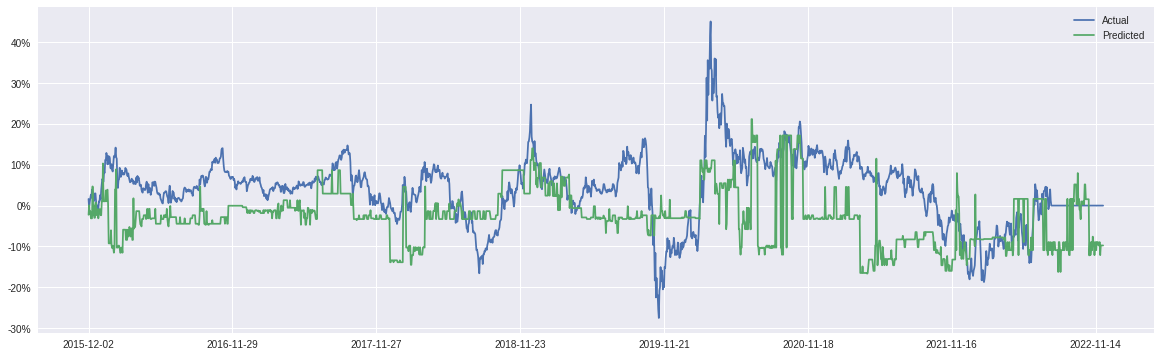

In [ ]:
# Decision Tree : Actual vs. Predicted graph
ax = df.plot(figsize=(20,6), grid=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

#### Below chart explains the distribution of absolute prediction errors.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


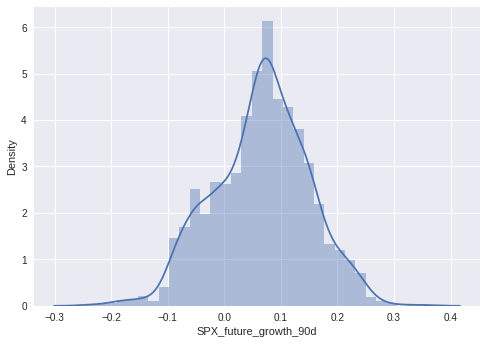

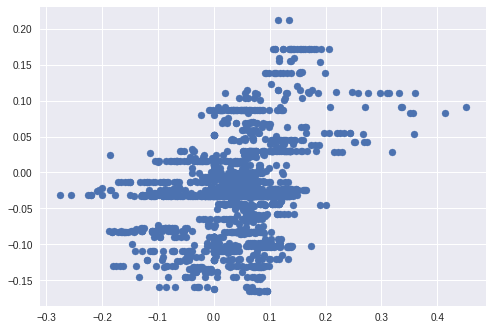

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# what is the distribution of errors?
sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test,y_pred)
plt.show()

#### Similary Training against Random Forest Model

In [ ]:
clf = RandomForestRegressor(max_depth=8, random_state=0)
clf.fit(X_train, y_train)

clf_imp = get_importance_features(clf)
y_pred_clf = clf.predict(X_test)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_clf})

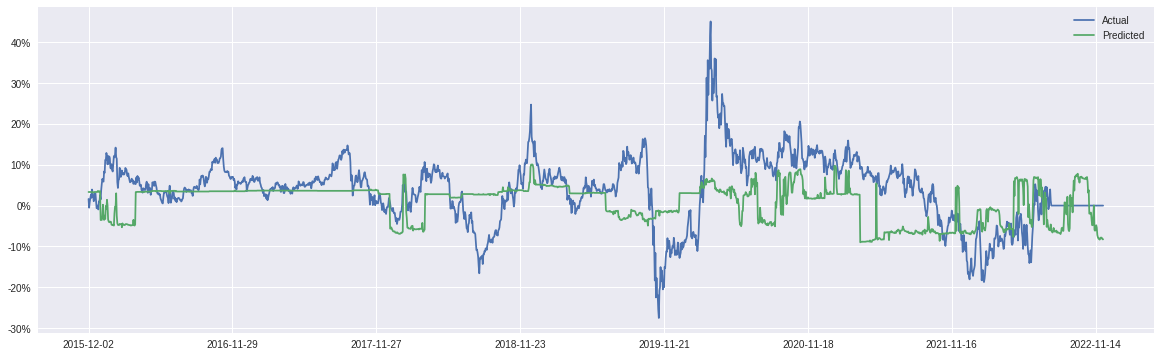

In [ ]:
# Random Forest regressor : Actual vs. Predicted graph
ax = df2.plot(figsize=(20,6), grid=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

### Parameter Tuning using Grid Search

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model = GridSearchCV(decision_tree_model, 
                            param_grid=parameters, 
                            scoring='neg_mean_squared_error',
                            cv=3,
                            verbose=3,
                            n_jobs = -1)

tuning_model.fit(X,y)
best_params = tuning_model.best_params_
print('Best Parameters: ', best_params)

best_params = {'max_depth': 11,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.3,
 'splitter': 'random'}

tuned_hyper_model= DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                         max_features=best_params['max_features'],
                                         max_leaf_nodes=best_params['max_leaf_nodes'],
                                         min_samples_leaf=best_params['min_samples_leaf'],
                                         min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
                                         splitter=best_params['splitter'])

{'max_depth': 11,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.3,
 'splitter': 'random'}

### Fit Model and Run Inference

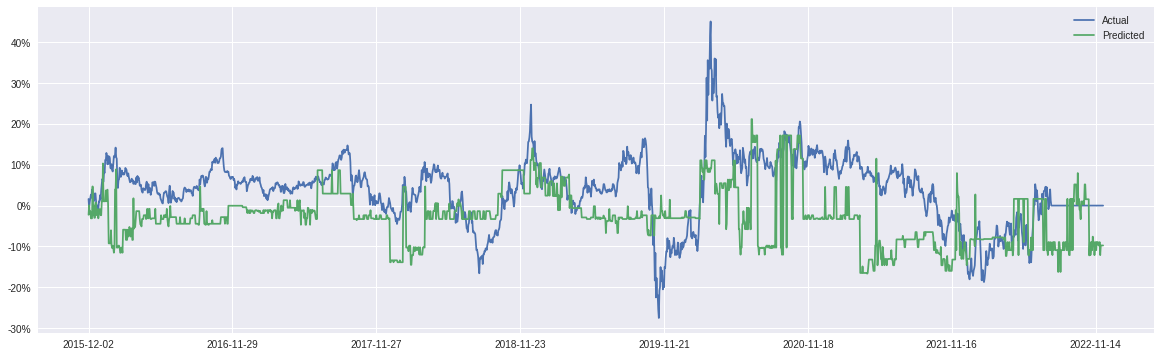

In [ ]:
tuned_hyper_model.fit(X_train, y_train)
tuned_pred = tuned_hyper_model.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted':tuned_pred})

ax = df.plot(figsize=(20,6), grid=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Model Evaluation

We have evaluated the model performance by calculating Mean Squared Error, Mean Absolute Error, Root Mean Squared error and also by plotting the Actual vs Pedicted stock Index return values. We have observed a better performance of the model after performing the parameter tuning from the parameters collected from Grid Search.

### Summary

Stock market indeces remain affected by numerous economic factors and it is not always relying on a set of factors specially in volatile economic and geo-polical conditions. In this project we explored the factors that generally account to stock moves in a general market condition and tried to find the stand-out factors. We realized bringing together these factors relies on careful data wrangling. We, also tried to model these factors to infer stock returns using tree based models. Overall, we found this exercise very useful to understand various economic indicators and how financial movements are accounted to these factors.

Video Link: https://youtu.be/_E0cuf2DWxc

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('_E0cuf2DWxc')

### Future Work

We have learnt looking at 20 years long time series of data, there are many instances we thought we can do data cleaning or fill any missing values. Also, we found it would be interesting to do forecast using Recurring neural networks like LSTMs or using Time Series models.

### References

* https://www.investopedia.com/articles/investing/031413/economic-indicatiors-affect-us-stock-market.asp

* https://fairmontequities.com/5-macro-factors-that-affect-the-stock-market/

* https://www.cnbc.com/advertorial/2018/06/11/macro-economic-factors-of-fundamental-analysis.html
